In [ ]:
import numpy as np
import pandas as pa
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


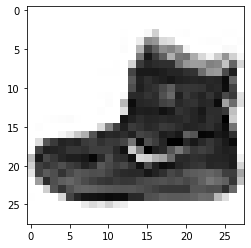

9


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.imshow(X_train[0], cmap=cm.Greys)
plt.show()
print(y_train[0])

In [ ]:
print(X_train.shape)
print(y_train.shape)
num_pixels = X_train.shape[1] * X_train.shape[2]

(60000, 28, 28)
(60000,)


In [ ]:
print(y_train)
print(X_test.size)

[9 0 0 ... 3 0 5]
7840000


#  **k-Nearest Neighbors**

In [ ]:
new_X_train = X_train.reshape(X_train.shape[0], num_pixels)
print(new_X_train.size)

from sklearn.neighbors import KNeighborsClassifier
k = 4
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(new_X_train, y_train)

47040000


KNeighborsClassifier(metric='euclidean', n_neighbors=4)

Nous avons essayé plusieurs k et c'est avec 4 que nous obtenons la meilleure accruracy

In [ ]:
new_X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(new_X_test.size)
y_pred = knn.predict(new_X_test)

7840000


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[886   1  20  14   3   1  72   1   2   0]
 [  8 971   3  10   4   0   3   0   1   0]
 [ 27   2 831  11  69   0  60   0   0   0]
 [ 48   7  15 868  25   0  34   0   3   0]
 [  4   1 151  32 743   0  67   0   2   0]
 [  2   0   0   0   0 855   4  77   0  62]
 [198   2 143  22  79   0 545   0  11   0]
 [  0   0   0   0   0   4   0 971   0  25]
 [  3   0  13   3   5   0  18   7 951   0]
 [  0   0   0   0   0   1   1  42   0 956]]


In [ ]:
acc = np.sum(np.diag(cm))/np.sum(cm)
print('{:.2%}'.format(acc))

85.77%


# **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
nb = GaussianNB()
nb.fit(new_X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(new_X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

acc = accuracy_score(y_test, y_pred)
print('{:.2%}'.format(acc))

[7 4 1 ... 3 1 7]
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]]
58.56%


# **ACP**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# z = scaler.fit_transform(new_X_train)

On a estimé qu'ici nous n'avions pas besoin de centrer les données car tous les pixels ont la même dimension

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
print(pca)

PCA()


In [ ]:
pca.fit_transform(new_X_train)

array([[-1.23993791e+02,  1.63307440e+03, -1.21104119e+03, ...,
         1.01150286e-02,  5.26382395e-02, -5.02000937e-03],
       [ 1.40792885e+03, -4.51641336e+02, -2.61027034e+02, ...,
        -8.79471010e-03,  3.30199846e-02, -1.61369260e-02],
       [-7.25910795e+02, -1.10183814e+03,  1.06154242e+02, ...,
         2.84631329e-03, -1.86294713e-03,  3.40699335e-05],
       ...,
       [ 8.57750196e+02, -1.18024018e+03, -5.20693994e+02, ...,
         7.48279798e-03,  4.77206726e-03,  4.08772823e-04],
       [-8.07476526e+02, -5.81218873e+02,  4.80319909e+02, ...,
         1.78505182e-02,  8.62760426e-03, -8.82580453e-03],
       [-1.81566381e+03, -1.19743343e+02,  4.68913798e+02, ...,
        -9.26107792e-04,  2.71390294e-02, -4.12902898e-04]])

In [ ]:
print(pca.n_components_)

784


In [ ]:
eigval = pca.explained_variance_
p = new_X_train.shape[1]
print(p)

784


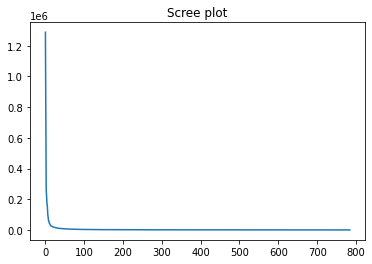

In [ ]:
plt.plot(np.arange(1,p+1),eigval) 
plt.title("Scree plot")
plt.show()

Notre courbe n'est pas optimale, on a donc déterminé la meilleure valeur du coude par test

In [ ]:
n_components = 4 
pca = PCA(n_components=n_components)
pca_X = pca.fit_transform(new_X_train)
total_variance = pca.explained_variance_ratio_.sum()
print('Total Explained Variance: ', total_variance)
print(pca_X.shape)

Total Explained Variance:  0.5777118788639686
(60000, 4)


On prends maintenant 2 axes pour pouvoir visualiser les données

In [ ]:
n_components = 2
pca = PCA(n_components=n_components)
pca_X = pca.fit_transform(new_X_train)
total_variance = pca.explained_variance_ratio_.sum()
print('Total Explained Variance: ', total_variance)
print(pca_X.shape)

Total Explained Variance:  0.4679453789952793
(60000, 2)


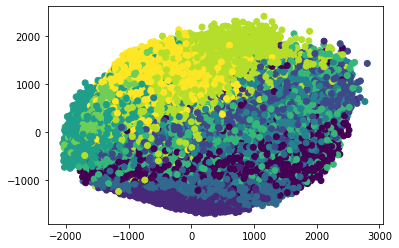

In [ ]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_train)

# **LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=4)
lda_X = lda.fit(new_X_train, y_train).transform(new_X_train)
total_variance = lda.explained_variance_ratio_.sum()
print('Total Explained Variance: ', total_variance)
print(lda_X.shape)

Total Explained Variance:  0.831907042896611
(60000, 4)


In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda_X = lda.fit(new_X_train, y_train).transform(new_X_train)
total_variance = lda.explained_variance_ratio_.sum()
print('Total Explained Variance: ', total_variance)
print(lda_X.shape)

Total Explained Variance:  0.665443592073969
(60000, 2)


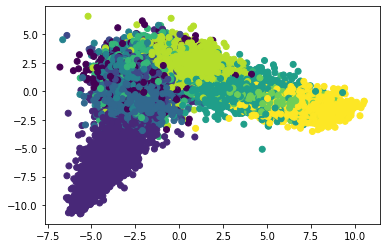

In [ ]:
plt.scatter(lda_X[:, 0], lda_X[:, 1], c=y_train)

On peut voir que la LDA est plus eficace que l'ACP, en effet pour le même nombre d'axes la lda_variance > acp_variance. De plus on peut voir visuellement que l'on sépare mieux les classes en utilisant la LDA.

# **Decision Trees**

In [ ]:
from sklearn import tree
cls1= tree.DecisionTreeClassifier(criterion='entropy')
cls1.fit(new_X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0631769 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0631769 to fit



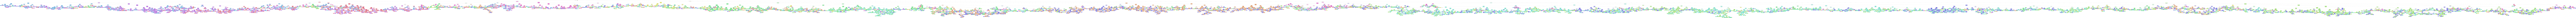

In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(cls1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('habit.png')
Image(graph.create_png())

In [ ]:
from sklearn import metrics
y_pred = cls1.predict(new_X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  80.08%


# **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(new_X_train, y_train)
y_pred = rf.predict(new_X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))

Accuracy:  87.53%


In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(new_X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


Ce test ne s'est jamais terminé

In [ ]:
rf_random.best_params_

In [ ]:
best_rf = RandomForestClassifier(bootstrap=True,
                                 max_depth=80,
                                 max_features='auto',
                                 min_samples_leaf=4,
                                 min_samples_split=5,
                                 n_estimators=1000)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ','{:2.2%}'.format(scores))